In [9]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Carregar os dados do Bitcoin
data_btc = pd.read_csv('BTC-USD_historical_data_cleaned.csv')

In [3]:
# Preparar os dados para o Prophet (colunas 'ds' e 'y')
data_btc_prophet = data_btc[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

In [4]:
# Converter a coluna 'ds' para o formato datetime
data_btc_prophet['ds'] = pd.to_datetime(data_btc_prophet['ds'])

In [5]:
# Dividir os dados em treino e teste (usando o final do conjunto de dados como teste)
train_size = int(len(data_btc_prophet) * 0.8)
train_btc = data_btc_prophet[:train_size]
test_btc = data_btc_prophet[train_size:]

In [10]:
# Treinar o modelo Prophet
model_btc_prophet = Prophet()
model_btc_prophet.fit(train_btc)

17:07:03 - cmdstanpy - INFO - Chain [1] start processing
17:07:04 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
# Fazer previsões
future_btc = model_btc_prophet.make_future_dataframe(periods=len(test_btc))
forecast_btc = model_btc_prophet.predict(future_btc)

/mnt/c/Atividade_Modulo7_Programacao/meu_projeto_crypto/venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/mnt/c/Atividade_Modulo7_Programacao/meu_projeto_crypto/venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


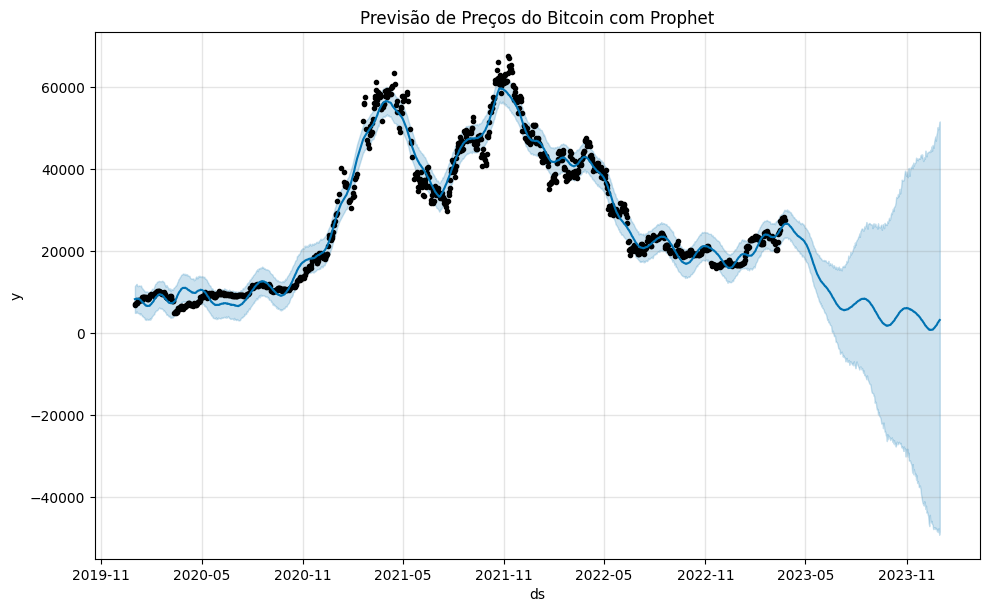

In [11]:
model_btc_prophet.plot(forecast_btc)
plt.title('Previsão de Preços do Bitcoin com Prophet')
plt.show()

In [8]:
# Avaliar o modelo no conjunto de teste
forecast_btc_test = forecast_btc[['ds', 'yhat']].tail(len(test_btc))
rmse_btc_prophet = mean_squared_error(test_btc['y'], forecast_btc_test['yhat'])
mae_btc_prophet = mean_absolute_error(test_btc['y'], forecast_btc_test['yhat'])

print(f'RMSE (Bitcoin - Prophet): {rmse_btc_prophet}')
print(f'MAE (Bitcoin - Prophet): {mae_btc_prophet}')

RMSE (Bitcoin - Prophet): 579574166.8863436
MAE (Bitcoin - Prophet): 21590.886875477296


In [12]:
# Carregar os dados do Ethereum
data_eth = pd.read_csv('ETH-USD_historical_data_cleaned.csv')

In [13]:
# Preparar os dados para o Prophet (colunas 'ds' e 'y')
data_eth_prophet = data_eth[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Converter a coluna 'ds' para o formato datetime
data_eth_prophet['ds'] = pd.to_datetime(data_eth_prophet['ds'])

In [14]:
# Dividir os dados em treino e teste
train_size = int(len(data_eth_prophet) * 0.8)
train_eth = data_eth_prophet[:train_size]
test_eth = data_eth_prophet[train_size:]

In [15]:
# Treinar o modelo Prophet
model_eth_prophet = Prophet()
model_eth_prophet.fit(train_eth)


17:10:27 - cmdstanpy - INFO - Chain [1] start processing
17:10:27 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
# Fazer previsões
future_eth = model_eth_prophet.make_future_dataframe(periods=len(test_eth))
forecast_eth = model_eth_prophet.predict(future_eth)

/mnt/c/Atividade_Modulo7_Programacao/meu_projeto_crypto/venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/mnt/c/Atividade_Modulo7_Programacao/meu_projeto_crypto/venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


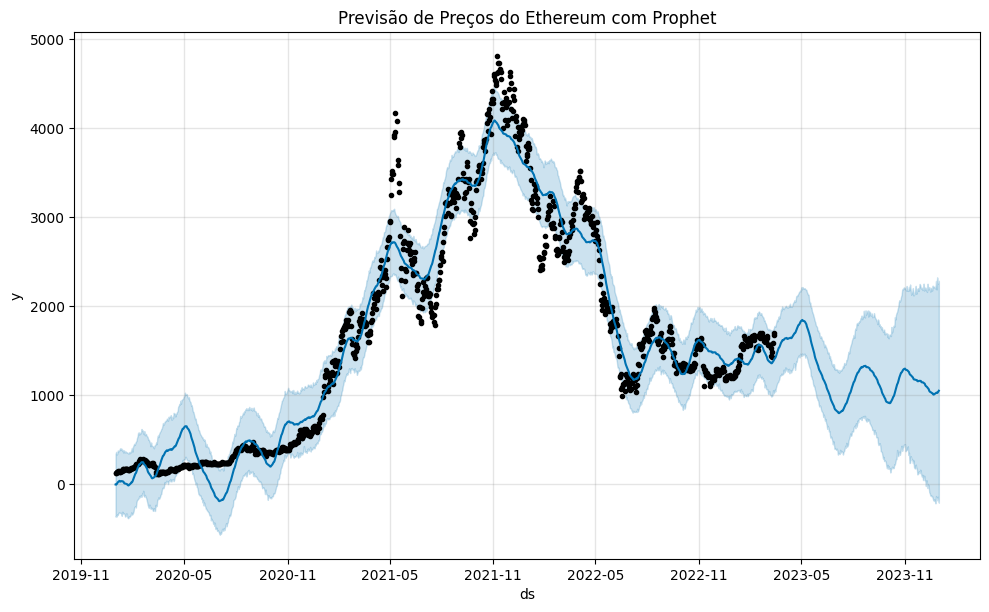

In [17]:
# Visualizar previsões com Matplotlib para o Ethereum
model_eth_prophet.plot(forecast_eth)
plt.title('Previsão de Preços do Ethereum com Prophet')
plt.show()

In [18]:
# Avaliar o modelo no conjunto de teste
forecast_eth_test = forecast_eth[['ds', 'yhat']].tail(len(test_eth))
rmse_eth_prophet = mean_squared_error(test_eth['y'], forecast_eth_test['yhat'], squared=False)
mae_eth_prophet = mean_absolute_error(test_eth['y'], forecast_eth_test['yhat'])

print(f'RMSE (Ethereum - Prophet): {rmse_eth_prophet}')
print(f'MAE (Ethereum - Prophet): {mae_eth_prophet}')

RMSE (Ethereum - Prophet): 701.8233840278317
MAE (Ethereum - Prophet): 612.4591423640302


/mnt/c/Atividade_Modulo7_Programacao/meu_projeto_crypto/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
